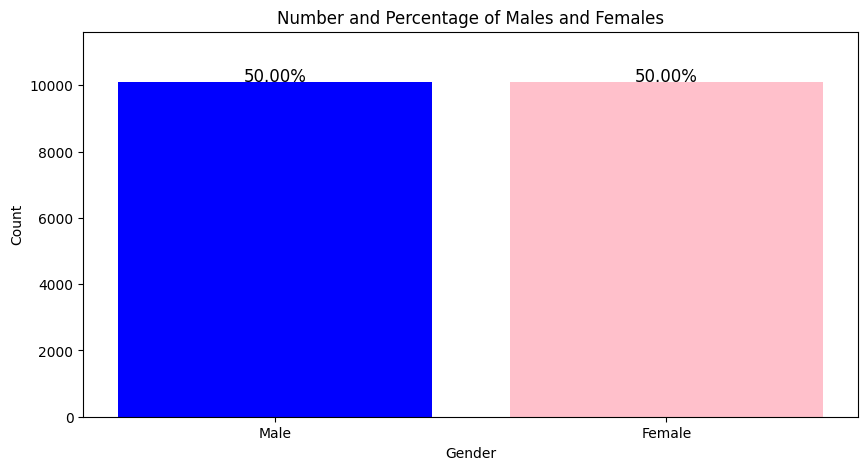

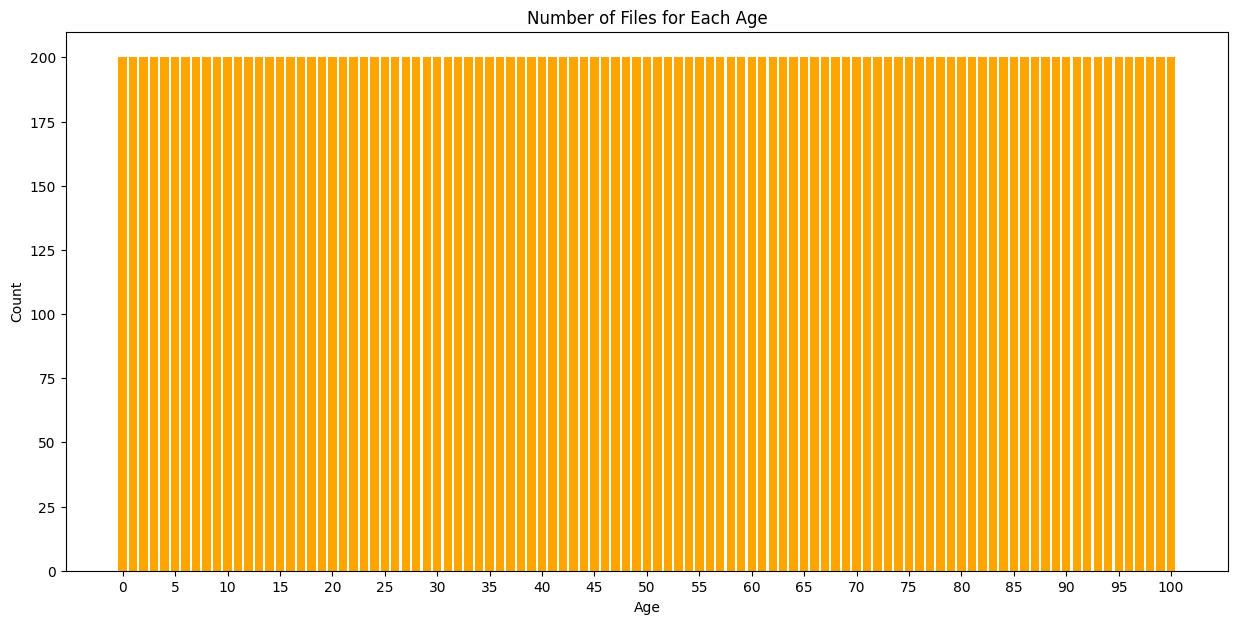

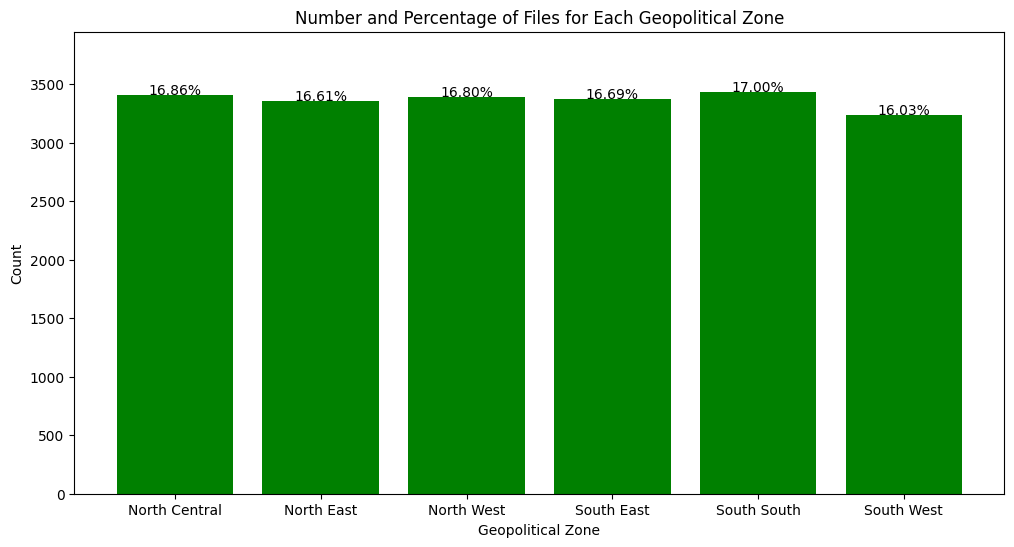

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Define the path to your folder
folder_path = '/Users/caculuz/Downloads/python/FAE_D1_collated_cleaned'  # Update this path to where your files are

# Get all files in the folder with specified extensions
file_extensions = ['.jpg', '.png', '.jpeg']
files = [f for f in os.listdir(folder_path) if any(f.lower().endswith(ext) for ext in file_extensions)]

# Define a mapping for geopolitical zones
geo_zones = {
    1: 'North Central',
    2: 'North East',
    3: 'North West',
    4: 'South East',
    5: 'South South',
    6: 'South West'
}

# Extract age, gender, and geopolitical zone information
ages = []
genders = []
zones = []
for file in files:
    parts = file.split('_')
    age = int(parts[0])
    gender = int(parts[1])
    zone = int(parts[2])
    ages.append(age)
    genders.append(gender)
    zones.append(geo_zones[zone])

# Count number of males and females
gender_counts = Counter(genders)
male_count = gender_counts.get(0, 0)
female_count = gender_counts.get(1, 0)

# Calculate the percentage for males and females
total_gender_count = male_count + female_count
male_percentage = (male_count / total_gender_count) * 100
female_percentage = (female_count / total_gender_count) * 100

# Count number of files for each age
age_counts = Counter(ages)

# Count number of files for each geopolitical zone
zone_counts = Counter(zones)

# Create DataFrame for visualization
gender_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': [male_count, female_count],
    'Percentage': [male_percentage, female_percentage]
})

age_df = pd.DataFrame.from_dict(age_counts, orient='index').reset_index()
age_df.columns = ['Age', 'Count']
age_df = age_df.sort_values(by='Age')

zone_df = pd.DataFrame.from_dict(zone_counts, orient='index').reset_index()
zone_df.columns = ['Zone', 'Count']
zone_df = zone_df.sort_values(by='Zone')

# Calculate the percentage for each zone
zone_df['Percentage'] = (zone_df['Count'] / zone_df['Count'].sum()) * 100

# Plot the number and percentage of males and females
plt.figure(figsize=(10, 5))
bars = plt.bar(gender_df['Gender'], gender_df['Count'], color=['blue', 'pink'])

# Add percentage labels above the bars
for bar, percentage in zip(bars, gender_df['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.title('Number and Percentage of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.ylim(0, max(gender_df['Count']) * 1.15)  # Adjust y-axis to give space for labels
plt.show()

# Plot the number of files per age (without percentage labels)
plt.figure(figsize=(15, 7))
bars = plt.bar(age_df['Age'], age_df['Count'], color='orange')

plt.title('Number of Files for Each Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(0, 101, 5))
plt.show()

# Plot the number and percentage of files per geopolitical zone
plt.figure(figsize=(12, 6))
bars = plt.bar(zone_df['Zone'], zone_df['Count'], color='green')

# Add percentage labels above the bars
for bar, percentage in zip(bars, zone_df['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{percentage:.2f}%', ha='center', fontsize=10)

plt.title('Number and Percentage of Files for Each Geopolitical Zone')
plt.xlabel('Geopolitical Zone')
plt.ylabel('Count')
plt.ylim(0, max(zone_df['Count']) * 1.15)  # Adjust y-axis to give space for labels
plt.show()


In [16]:
print(f"Predicted Age: 0 | Actual Age: 2")


Predicted Age: 0 | Actual Age: 2
